In [1]:
import pymongo
import pandas as pd
import os

In [2]:
connection_string = "mongodb://localhost:27017/dataMining"

In [3]:
client = pymongo.MongoClient(connection_string)
db = client['image_caption_db']
collection = db['image_captions']

In [6]:
data = pd.read_csv('../data/captions.txt')

In [7]:
# Insert each row from the DataFrame into the MongoDB collection
for index, row in data.iterrows():
    image = row['image']
    caption = row['caption']
    
    # Insert document into the collection
    collection.insert_one({
        'image': image,
        'caption': caption
    })

print("Data inserted successfully.")

Data inserted successfully.


Đọc dữ liệu từ jupyter notebook và phân tích dữ liệu với pandas.

In [8]:
# Fetch all data from MongoDB into a DataFrame
cursor = collection.find({})
data = pd.DataFrame(list(cursor))

image_caption_counts = data['image'].value_counts()

print("number of captions for each image")
print(image_caption_counts)

number of captions for each image
image
1000092795.jpg    25
2845084079.jpg    25
2845086305.jpg    25
2845246160.jpg    25
2845525442.jpg    25
                  ..
4435179084.jpg    15
4435313832.jpg    15
4435343922.jpg    15
4435598180.jpg    15
998845445.jpg     15
Name: count, Length: 31783, dtype: int64


In [9]:
print("There are {} image to captions".format(len(data)))

There are 613635 image to captions


In [10]:
data.head(10)

,_id,image,caption
0,65faeac65474ab67089fee52,1000092795.jpg,Two young guys with shaggy hair look at their...
1,65faeac65474ab67089fee53,1000092795.jpg,"Two young , White males are outside near many..."
2,65faeac65474ab67089fee54,1000092795.jpg,Two men in green shirts are standing in a yard .
3,65faeac65474ab67089fee55,1000092795.jpg,A man in a blue shirt standing in a garden .
4,65faeac65474ab67089fee56,1000092795.jpg,Two friends enjoy time spent together .
5,65faeac65474ab67089fee57,10002456.jpg,Several men in hard hats are operating a gian...
6,65faeac65474ab67089fee58,10002456.jpg,Workers look down from up above on a piece of...
7,65faeac65474ab67089fee59,10002456.jpg,Two men working on a machine wearing hard hats .
8,65faeac65474ab67089fee5a,10002456.jpg,Four men on top of a tall structure .
9,65faeac65474ab67089fee5b,10002456.jpg,Three men on a large rig .


1. Lọc dữ liệu và tính toán khoảng cách với hàm Haversine Distance Calculation.

Đầu tiên,ta sẽ lọc dữ liệu dựa trên một điều kiện, sau đó tính khoảng cách giữa hai điểm bằng công thức Haversine

Hàm tính khoảng cách Haversine: tính khoảng cách giữa hai điểm vĩ độ/kinh độ:

In [11]:
import numpy as np
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of earth in kilometers
    r = 6371.0

    # Calculate the distance
    distance = r * c
    return distance

Bây giờ, hãy lọc dữ liệu dựa trên một điều kiện (ví dụ: chọn hình ảnh có chú thích cụ thể là "young") rồi tính khoảng cách giữa hai điểm.


In [12]:
data['lat1'] = np.random.uniform(30, 40, len(data))
data['lon1'] = np.random.uniform(-120, -100, len(data))
data['lat2'] = np.random.uniform(30, 40, len(data))
data['lon2'] = np.random.uniform(-120, -100, len(data))

# Drop rows with NaN values in specific columns
data = data.dropna(subset=['lat1', 'lon1', 'lat2', 'lon2'])

# Filter data based on a condition which is "yuong"
filtered_data = data[data['caption'].str.contains('young', na=False)]
filtered_data['distance'] = haversine(filtered_data['lat1'], filtered_data['lon1'],
                                     filtered_data['lat2'], filtered_data['lon2'])

# Print the filtered data with distance
print(filtered_data[['image', 'caption', 'distance']])

                 image                                            caption  \
0       1000092795.jpg   Two young guys with shaggy hair look at their...   
1       1000092795.jpg   Two young , White males are outside near many...   
37        10010052.jpg   A young adult wearing rollerblades , holding ...   
38        10010052.jpg   there is a young girl on her cellphone while ...   
42      1001465944.jpg   A young woman walks past two young people dre...   
...                ...                                                ...   
613541   989754491.jpg   A young girl with goggles and floaties poses ...   
613625    99804383.jpg   An older busker in glasses plays an Eastern s...   
613627    99804383.jpg   A older Asian man is playing an instrument in...   
613628    99804383.jpg   An elderly man sits outside a storefront acco...   
613631   998845445.jpg   A young man hanging over the side of a boat ,...   

           distance  
0        784.022821  
1       1007.863562  
37       

C:\Users\Admin\AppData\Local\Temp\ipykernel_25552\2742037887.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['distance'] = haversine(filtered_data['lat1'], filtered_data['lon1'],


2. Vẽ đồ thị từ dữ liệu truy vấn với Matplotlib và NumPy.

vẽ đồ thị dữ liệu bằng Matplotlib và NumPy; ta sẽ tạo một biểu đồ phân tán đơn giản để trực quan hóa mối quan hệ giữa khoảng cách và một số thuộc tính khác


C:\Users\Admin\AppData\Local\Temp\ipykernel_25552\1545297525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['image_count'] = np.random.randint(1, len(data), len(filtered_data))


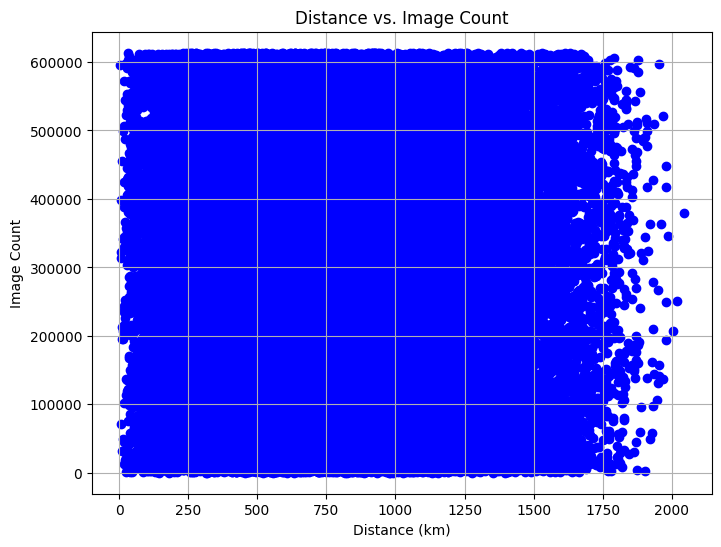

In [13]:
import matplotlib.pyplot as plt

# Assuming we have some other attribute (e.g., number of images)
filtered_data['image_count'] = np.random.randint(1, len(data), len(filtered_data))

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['distance'], filtered_data['image_count'], color='blue')
plt.xlabel('Distance (km)')
plt.ylabel('Image Count')
plt.title('Distance vs. Image Count')
plt.grid(True)
plt.show()

3. Xây dựng hàm hồi quy tuyến tính với SciPy.

Slope: 3.864047068416075
Intercept: 304237.4271803722
R-squared: 7.405070548201872e-05
p-value: 0.06406057486294763
Standard Error: 2.086641223405594


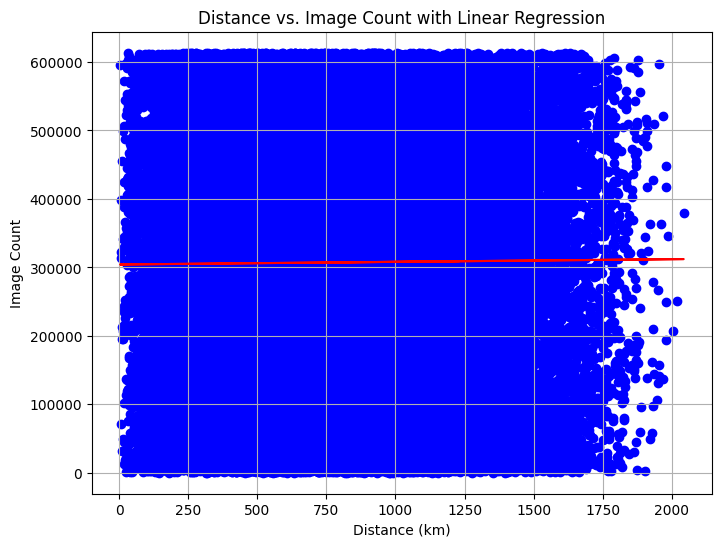

In [14]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_data['distance'], filtered_data['image_count'])

# Print the regression results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
print("Standard Error:", std_err)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['distance'], filtered_data['image_count'], color='blue')
plt.plot(filtered_data['distance'], intercept + slope * filtered_data['distance'], color='red')
plt.xlabel('Distance (km)')
plt.ylabel('Image Count')
plt.title('Distance vs. Image Count with Linear Regression')
plt.grid(True)
plt.show()

4. Test với các hàm hồi quy logarit, hàm lượng giác, hàm lũy thừa, hàm Gauss, và đường cong Lorenz.

Hồi quy logarit

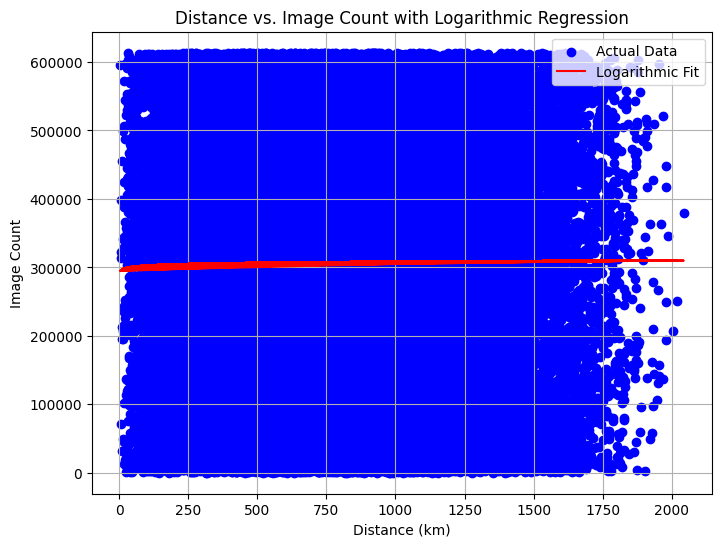

In [15]:
# Logarithmic Regression

from scipy.optimize import curve_fit

# Define the logarithmic function
def logarithmic_func(x, a, b):
    return a * np.log(x) + b

# Fit the logarithmic function
popt_log, pcov_log = curve_fit(logarithmic_func, filtered_data['distance'], filtered_data['image_count'])

# Get the predicted values from the logarithmic function
predicted_log = logarithmic_func(filtered_data['distance'], *popt_log)

# Plot the data and the logarithmic curve
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['distance'], filtered_data['image_count'], color='blue', label='Actual Data')
plt.plot(filtered_data['distance'], predicted_log, color='red', label='Logarithmic Fit')
plt.xlabel('Distance (km)')
plt.ylabel('Image Count')
plt.title('Distance vs. Image Count with Logarithmic Regression')
plt.legend()
plt.grid(True)
plt.show()

Hàm lượng giác

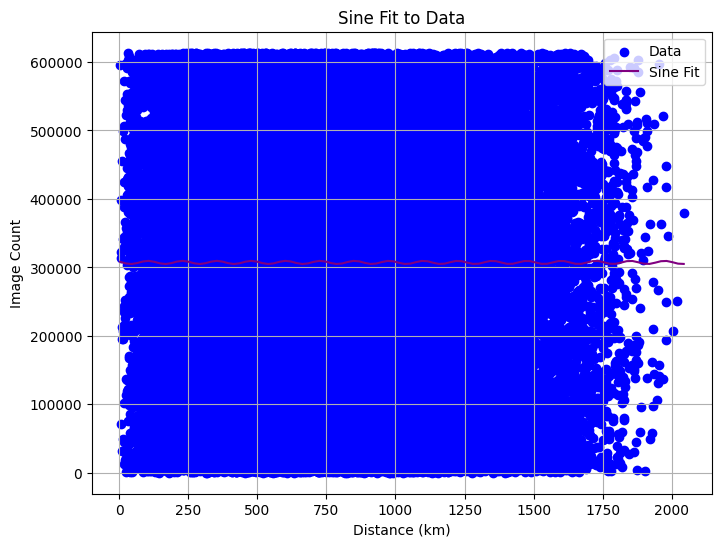

In [29]:
# Trigonometric Function (Sine):

def sine_func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Fit the sine function to the data
popt_sine, pcov_sine = curve_fit(sine_func, filtered_data['distance'], filtered_data['image_count'])

# Generate points for the sine curve
x_sine = np.linspace(min(filtered_data['distance']), max(filtered_data['distance']), 100)
y_sine = sine_func(x_sine, *popt_sine)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['distance'], filtered_data['image_count'], color='blue', label='Data')
plt.plot(x_sine, y_sine, color='purple', label='Sine Fit')
plt.xlabel('Distance (km)')
plt.ylabel('Image Count')
plt.title('Sine Fit to Data')
plt.legend()
plt.grid(True)
plt.show()


Hàm lũy thừa

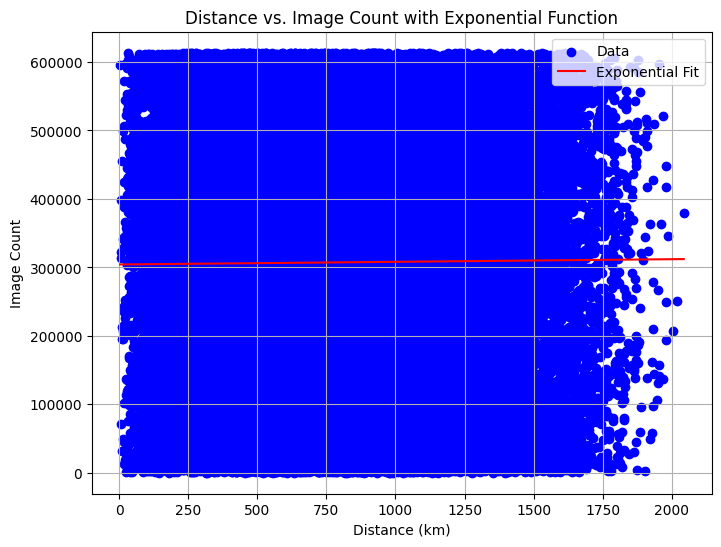

Exponential Function Parameters (a, b): [3.04262247e+05 1.25179400e-05]


In [24]:
# Exponential Function

def exponential_function(x, a, b):
    return a * np.exp(b * x)

# Check if there are enough data points
if len(filtered_data) < 2:
    print("Not enough data points to fit exponential function.")
else:
    # Provide initial guesses for parameters
    initial_guess_exp = [1.0, 0.01]  # This can be adjusted based on the data

    try:
        # Fit the model
        params_exp, covariance_exp = curve_fit(exponential_function, filtered_data['distance'], filtered_data['image_count'], p0=initial_guess_exp)

        # Plot the data and the fitted curve
        plt.figure(figsize=(8, 6))
        plt.scatter(filtered_data['distance'], filtered_data['image_count'], color='blue', label='Data')
        plt.plot(filtered_data['distance'].sort_values(), exponential_function(filtered_data['distance'].sort_values(), *params_exp), color='red', label='Exponential Fit')
        plt.xlabel('Distance (km)')
        plt.ylabel('Image Count')
        plt.title('Distance vs. Image Count with Exponential Function')
        plt.legend()
        plt.grid(True)
        plt.show()

        print("Exponential Function Parameters (a, b):", params_exp)
    except RuntimeError:
        print("Optimal parameters not found. Try adjusting initial guesses.")

Hàm Gauss

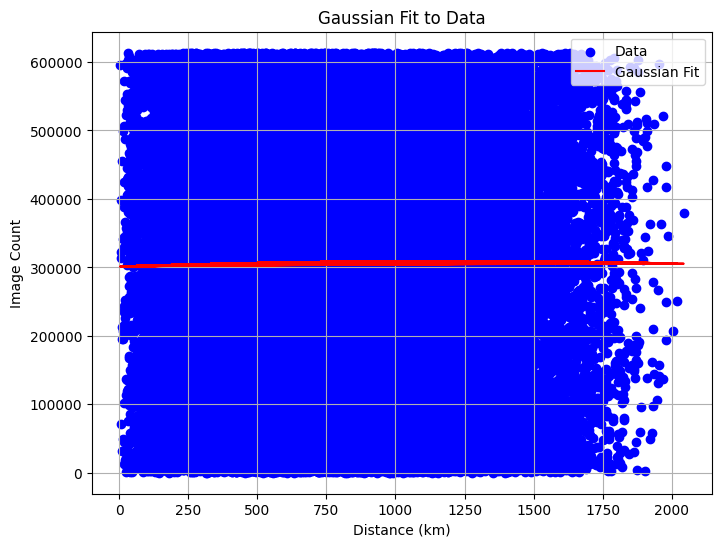

In [26]:
# Gauss Brackets

def gauss_func(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

popt_gauss, pcov_gauss = curve_fit(gauss_func, filtered_data['distance'], filtered_data['image_count'])

plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['distance'], filtered_data['image_count'], color='blue', label='Data')
plt.plot(filtered_data['distance'], gauss_func(filtered_data['distance'], *popt_gauss), color='red', label='Gaussian Fit')
plt.xlabel('Distance (km)')
plt.ylabel('Image Count')
plt.title('Gaussian Fit to Data')
plt.legend()
plt.grid(True)
plt.show()

Đường cong Lorenz

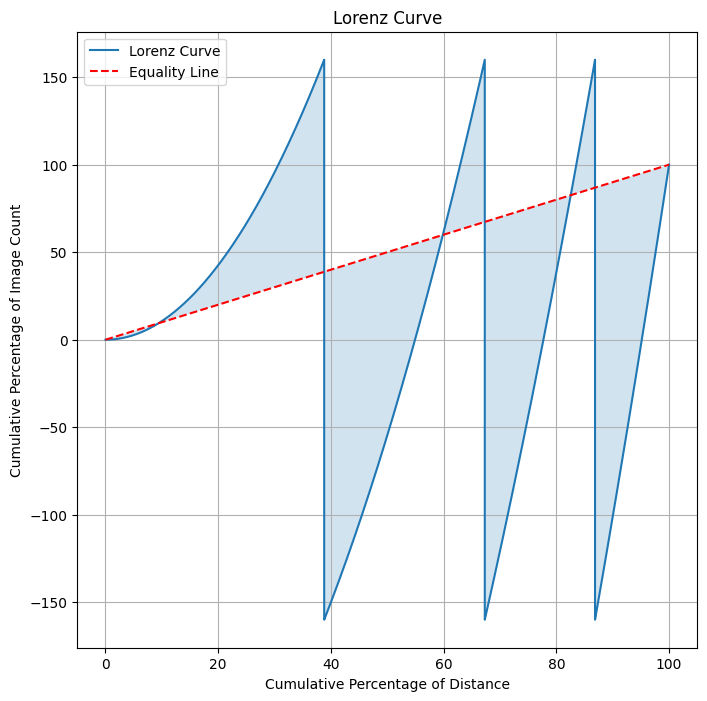

In [23]:
#  Lorenz Curves
sorted_counts = filtered_data['image_count'].sort_values()
cumulative_counts = np.cumsum(sorted_counts)
total_counts = cumulative_counts.iloc[-1]
cumulative_percentage = (cumulative_counts / total_counts) * 100

# Calculate cumulative percentage of distances
sorted_distances = filtered_data['distance'].sort_values()
cumulative_distances = np.cumsum(sorted_distances)
total_distance = cumulative_distances.iloc[-1]
cumulative_distance_percentage = (cumulative_distances / total_distance) * 100

# Plot Lorenz Curve
plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0, 100, len(cumulative_percentage)), cumulative_percentage, label='Lorenz Curve')
plt.plot(np.linspace(0, 100, len(cumulative_percentage)), np.linspace(0, 100, len(cumulative_percentage)), linestyle='--', color='red', label='Equality Line')
plt.fill_between(np.linspace(0, 100, len(cumulative_percentage)), cumulative_percentage, np.linspace(0, 100, len(cumulative_percentage)), alpha=0.2)
plt.xlabel('Cumulative Percentage of Distance')
plt.ylabel('Cumulative Percentage of Image Count')
plt.title('Lorenz Curve')
plt.legend()
plt.grid(True)
plt.show()